# Capstone Project - Car Accident Severity in Belfast City (Week 2 & 3)

##### Olatunde Awobuluyi

###  Data Science Specialization Capstone Project offered by IBM on Coursera


### -------------------------------------------------------------------------------------------------------------------------------------------------------

## Table of Contents

* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Exploratory Data Analysis](#Exploration) 

### -------------------------------------------------------------------------------------------------------------------------------------------------------

## Introduction: Business Problem <a name="introduction"></a>

Between **2016 & 2019**, there have been **23731** police recorded injuries due to road traffic collision in **11 districts** in Northern Ireland. Each record indicates how severe the outcome of the collision is. 

The severity of these outcomes ranges from **1(Fatal injury collision)** to **3(Slight injury collision)**; with **2(Serious injury collision)**  being the middle value.

During this period (2016 to 2019), **Belfast City** had the highest number of recorded incidents with **5872** cases, and the district of **Armagh City**, **Banbridge & Craigavon** having the second-highest number of recorded incidents with **2329** cases. 

The dataset we have will be useful to the police of Northern Ireland, however, we want to explore and create a prediction model for Belfast City. 

We believe the outcome of this exercise will be very useful to the **Belfast City Council** in designing and constructing new roads or modifying existing roads when considering variables like speed limits, one way, the position of traffic lights etc

### -------------------------------------------------------------------------------------------------------------------------------------------------------

## Data <a name="data"></a>

#### This data set was published with an Open Government Licence on the data.gov.uk website and its titled <a href="https://data.gov.uk/dataset/4ddb6259-b47c-44e6-ac91-6d95dd527d26/police-recorded-injury-road-traffic-collision-statistics-northern-ireland-2016">"Police Recorded Injury Road Traffic Collision Statistics Northern Ireland 2016" </a> 

The dataset for **2017, 2018, and 2019** have been added to this data set to make it richer for analysis



The entire dataset that includes all **11** districts has **23731** entries as mentioned earlier. Records from 2016 to 2019 were joined together to create a <a href="https://app.box.com/s/yqr1w8rjlro77ieckqcwmfub8bdcpja0">richer data set</a>.

However, the following **9** fields have either **20902** or **20903** missing values.

    a_jdet            20902
    a_jcont           20902
    a_pedhum          20903
    a_pedphys         20903
    a_light           20902
    a_weat            20902
    a_roadsc          20902
    a_speccs          20902
    a_chaz            20902
    a_scene           20902

**The name of these fields will be changed to something easier to read in the next section**
    
We won’t be dropping the missing data because of the sheer amount. Replacing these empty fields or data by the **frequency(mode)** of the categorical data in each of these columns will be the approach used. 

Please view the data guide document  <a href="https://app.box.com/s/x734lsyrb4jkavxqtoxjvmkoqyg5odpo">data guide document</a> for a description of each of the aforementioned fields.

Dropping all rows with missing data shows that the target variable **'a_type'** for collision severity will be unbalanced. Please view the <a href="https://app.box.com/s/x734lsyrb4jkavxqtoxjvmkoqyg5odpo">data guide document</a>  for a description of the **'a_type'** field.

### Cleaning the Data

Before any exploratory analysis is done, the original dataset comprising incidents for all districts will be trimmed down to entries just for **Belfast City** and checked if the trimmed dataset is balanced. 


In [12]:
# Importing all the necessary libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from warnings import simplefilter   # To filter out "scikit-learn" upcoming changes warning messages 
simplefilter(action='ignore', category=FutureWarning)

In [13]:
filename = "/home/tunde/Documents/COURSERA-DATA-SCIENCE-SPECIALIZATION/4_APPLIED_DATA_SCIENCE_CAPSTONE/Data_Set/Police_Record/collision2016_to_2019.csv"


In [14]:
df = pd.read_csv(filename)


In [15]:
df.head()

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
0,2016,1,NEMD,3,1,1,FRI,1,1,1,...,,,,,,,,,,
1,2016,2,DCST,3,2,1,FRI,1,1,3,...,,,,,,,,,,
2,2016,3,ARND,2,1,1,FRI,1,1,3,...,1,1,1,1,6,2,4,1,1,1
3,2016,4,BELC,3,2,2,FRI,1,1,3,...,,,,,,,,,,
4,2016,5,BELC,3,2,1,FRI,1,1,15,...,,,,,,,,,,


### Checking the number of entries, columns, and data types for each colunm of the data set 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23731 entries, 0 to 23730
Data columns (total 25 columns):
a_year        23731 non-null int64
a_ref         23731 non-null int64
a_District    23731 non-null object
a_type        23731 non-null int64
a_veh         23731 non-null int64
a_cas         23731 non-null int64
a_wkday       23731 non-null object
a_day         23731 non-null int64
a_month       23731 non-null int64
a_hour        23731 non-null int64
a_min         23731 non-null int64
a_gd1         23731 non-null int64
a_gd2         23731 non-null int64
a_ctype       23731 non-null int64
a_speed       23731 non-null int64
a_jdet        23731 non-null object
a_jcont       23731 non-null object
a_pedhum      23731 non-null object
a_pedphys     23731 non-null object
a_light       23731 non-null object
a_weat        23731 non-null object
a_roadsc      23731 non-null object
a_speccs      23731 non-null object
a_chaz        23731 non-null object
a_scene       23731 non-null object
dtyp

There are a lot of missing values in the last 10 columns. We can confirm that there are **20903** missing values for these columns. This gives us **(23731 - 20903)** number of entries **( 2828 entries)**. 



In [18]:
new_df = df.replace(r'^\s*$', np.nan, regex=True)  # replacing the empty spaces in the dataset with "NaN"
new_df.isnull().sum(axis=0)  # check columns with missing values 

a_year            0
a_ref             0
a_District        0
a_type            0
a_veh             0
a_cas             0
a_wkday           0
a_day             0
a_month           0
a_hour            0
a_min             0
a_gd1             0
a_gd2             0
a_ctype           0
a_speed           0
a_jdet        20902
a_jcont       20902
a_pedhum      20903
a_pedphys     20903
a_light       20902
a_weat        20902
a_roadsc      20902
a_speccs      20902
a_chaz        20902
a_scene       20902
dtype: int64

##### function to replace the missing values in colunms with missing values with the mode values and convert the data types in these columns from object data type to int64 data type

In [19]:
missing_data_cols = ["a_jdet", "a_jcont", "a_pedhum", "a_pedphys", "a_light", "a_weat", "a_roadsc", "a_speccs", "a_chaz", "a_chaz", "a_scene"]

# function to replace the missing values in colunms with missing values with the mode values 
# and convert the data types in these columns from object data type to int64 data type

def replace_with_mode(dataframe, list_of_columns):
    
    for v in list_of_columns:
        
        mean = 0
        
        mean = pd.to_numeric(dataframe[v].value_counts().idxmax(), errors='coerce') # compute the mean
        
        dataframe[v] = pd.to_numeric(dataframe[v], errors='coerce') # change datatype in column to numeric type
        
        dataframe[v].replace(np.nan,mean,inplace=True)        # Replace empty slots with the mean value
        
    return dataframe

test = replace_with_mode(new_df, missing_data_cols)

print(test.dtypes)

a_year          int64
a_ref           int64
a_District     object
a_type          int64
a_veh           int64
a_cas           int64
a_wkday        object
a_day           int64
a_month         int64
a_hour          int64
a_min           int64
a_gd1           int64
a_gd2           int64
a_ctype         int64
a_speed         int64
a_jdet        float64
a_jcont       float64
a_pedhum      float64
a_pedphys     float64
a_light       float64
a_weat        float64
a_roadsc      float64
a_speccs      float64
a_chaz        float64
a_scene       float64
dtype: object


#### Confirm that the missing cells have been replaced with the necessary values

In [20]:

new_df.isnull().sum(axis=0)

a_year        0
a_ref         0
a_District    0
a_type        0
a_veh         0
a_cas         0
a_wkday       0
a_day         0
a_month       0
a_hour        0
a_min         0
a_gd1         0
a_gd2         0
a_ctype       0
a_speed       0
a_jdet        0
a_jcont       0
a_pedhum      0
a_pedphys     0
a_light       0
a_weat        0
a_roadsc      0
a_speccs      0
a_chaz        0
a_scene       0
dtype: int64

##### Rename the columns in the dataframe 

In [21]:
# Dictionary with new column headers
New_Column_Headers = {'a_year':'Year', 'a_ref':'Reference_No', 'a_District':'District', 'a_type':'Collision_Severity', 'a_veh':'Number_of_Vehicles', 'a_cas':'Number_of_Casualities', 'a_wkday':'Weekday_of_Collision', 'a_day':'Week_of_Collision', 'a_month':'Month_of_Collision', 'a_hour':'Hour_of_Collision', 'a_min':'Minute_of-Collision', 'a_gd1':'Location_Easting', 'a_gd2':'Location_Northing', 'a_ctype':'Carriageway_Type', 'a_speed':'Speed_Limit', 'a_jdet':'Junction_Detail', 'a_jcont':'Junction-Control', 'a_pedhum':'Pedestrian_Crossing_Human_Control', 'a_pedphys':'Pedestrian_Crossing_Physical_Control', 'a_light':'Light_Conditions', 'a_weat':'Weather_Conditions', 'a_roadsc':'Road_Surface_Conditions', 'a_speccs':'Special_Conditions_at_Site', 'a_chaz':'Carriageway_Harzard', 'a_scene':'Police_at_Scene'}
new_df = new_df.rename(columns=New_Column_Headers)
new_df

,Year,Reference_No,District,Collision_Severity,Number_of_Vehicles,Number_of_Casualities,Weekday_of_Collision,Week_of_Collision,Month_of_Collision,Hour_of_Collision,...,Junction_Detail,Junction-Control,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Harzard,Police_at_Scene
0,2016,1,NEMD,3,1,1,FRI,1,1,1,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,2016,2,DCST,3,2,1,FRI,1,1,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
2,2016,3,ARND,2,1,1,FRI,1,1,3,...,1.0,1.0,1.0,1.0,6.0,2.0,4.0,1.0,1.0,1.0
3,2016,4,BELC,3,2,2,FRI,1,1,3,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
4,2016,5,BELC,3,2,1,FRI,1,1,15,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
5,2016,6,DCST,3,2,3,FRI,1,1,15,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
6,2016,7,BELC,3,2,2,FRI,1,1,16,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
7,2016,8,BELC,3,2,1,SAT,2,1,0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
8,2016,9,BELC,3,2,2,SAT,2,1,8,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
9,2016,10,ANTN,2,3,7,SAT,2,1,8,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0


##### Confirm that datatypes have changed in the new dataframe

In [22]:
print(new_df.dtypes)

Year                                      int64
Reference_No                              int64
District                                 object
Collision_Severity                        int64
Number_of_Vehicles                        int64
Number_of_Casualities                     int64
Weekday_of_Collision                     object
Week_of_Collision                         int64
Month_of_Collision                        int64
Hour_of_Collision                         int64
Minute_of-Collision                       int64
Location_Easting                          int64
Location_Northing                         int64
Carriageway_Type                          int64
Speed_Limit                               int64
Junction_Detail                         float64
Junction-Control                        float64
Pedestrian_Crossing_Human_Control       float64
Pedestrian_Crossing_Physical_Control    float64
Light_Conditions                        float64
Weather_Conditions                      

#### Checking if the categorical target variable is balanced

In [23]:
new_df['Collision_Severity'].value_counts()

3    20902
2     2596
1      233
Name: Collision_Severity, dtype: int64

#### Check a random independent variable to see if it doesn't have missing values and how balanced the distribution is 

In [24]:
new_df['Light_Conditions'].value_counts()


2.0    21806
1.0      718
4.0      407
6.0      364
3.0      274
7.0      147
5.0       15
Name: Light_Conditions, dtype: int64

### -------------------------------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis: <a name="Exploration"></a>

For exploratory data analysis, the **categorical target variable 'Collision_Severity'** as mentioned earlier will be the evaluated via correlation with the independent variables **'Number_of_Vehicles'**, **'Speed_Limit'**, **'Junction_Detail'**, **'Junction_Control'**, **'Road_Surface_Conditions'**, **'Light_Conditions'**, **'Weather_Conditions'**, and so on. 

In [19]:
new_df['Collision_Severity'].value_counts()

3    20902
2     2596
1      233
Name: Collision_Severity, dtype: int64

In [21]:
new_df['Junction_Detail'].value_counts()


1.0     1344
12.0     796
10.0     294
6.0      210
2.0       97
8.0       52
9.0       24
3.0       12
Name: Junction_Detail, dtype: int64

       Year  Reference_No District Collision_Severity  Number_of_Vehicles  \
0      2016             1     NEMD               None                   1   
1      2016             2     DCST               None                   2   
2      2016             3     ARND               None                   1   
3      2016             4     BELC               None                   2   
4      2016             5     BELC               None                   2   
5      2016             6     DCST               None                   2   
6      2016             7     BELC               None                   2   
7      2016             8     BELC               None                   2   
8      2016             9     BELC               None                   2   
9      2016            10     ANTN               None                   3   
10     2016            11     ARBC               None                   2   
11     2016            12     BELC               None                   2   

In [55]:
new_df['Collision_Severity'].value_counts()

Series([], Name: Collision_Severity, dtype: int64)

### Getting a summary description of the new dataframe 

In [7]:
new_df.describe(include = "all")

,Year,Reference_No,District,Collision_Severity,Number_of_Vehicles,Number_of_Casualities,Weekday_of_Collision,Week_of_Collision,Month_of_Collision,Hour_of_Collision,...,Junction_Detail,Junction-Control,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Harzard,Police_at_Scene
count,23731.000000,23731.000000,23731,23731.00000,23731.000000,23731.000000,23731,23731.000000,23731.000000,23731.000000,...,23731,23731,23731,23731,23731,23731,23731,23731,23731,23731
unique,NaN,NaN,11,NaN,NaN,NaN,7,NaN,NaN,NaN,...,9,6,4,7,8,11,11,7,7,3
top,NaN,NaN,BELC,NaN,NaN,NaN,FRI,NaN,NaN,NaN,...,,,,,,,,,,
freq,NaN,NaN,5872,NaN,NaN,NaN,3931,NaN,NaN,NaN,...,20902,20902,20903,20903,20902,20902,20902,20902,20902,20902
mean,2017.458303,2971.237917,NaN,2.87097,1.867304,1.532721,NaN,15.652817,6.647929,13.723610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.118618,1720.229069,NaN,0.36335,0.652304,1.018194,NaN,8.765668,3.481886,4.989497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.000000,1.000000,NaN,1.00000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2016.000000,1484.000000,NaN,3.00000,1.000000,1.000000,NaN,8.000000,4.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,2967.000000,NaN,3.00000,2.000000,1.000000,NaN,16.000000,7.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,4450.000000,NaN,3.00000,2.000000,2.000000,NaN,23.000000,10.000000,17.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of missing values in the last 10 columns. We can confirm that there are **20903** missing values for these columns. This gives us **(23731 - 20903)** number of entries **( 2828 entries)**. We may have to drop these columns later

In [8]:
new_df = df.replace(r'^\s*$', np.nan, regex=True)
new_df.isnull().sum(axis=0)


a_year            0
a_ref             0
a_District        0
a_type            0
a_veh             0
a_cas             0
a_wkday           0
a_day             0
a_month           0
a_hour            0
a_min             0
a_gd1             0
a_gd2             0
a_ctype           0
a_speed           0
a_jdet        20902
a_jcont       20902
a_pedhum      20903
a_pedphys     20903
a_light       20902
a_weat        20902
a_roadsc      20902
a_speccs      20902
a_chaz        20902
a_scene       20902
dtype: int64

###### We have 11 unique Districts for Northern Ireland as entries in the dataset. Here we can see "BELC" (Belfast City) has the highest number of entries at 5872. We might want to observe the how speed limits "a_speed" affects Collision in the Belfast City district 

In [9]:
df['a_District'].value_counts()

BELC    5872
ARBC    2329
NEMD    2114
LISC    2056
ANTN    1887
DCST    1751
MIDU    1684
ARND    1661
CCGL    1641
MEAN    1414
FERO    1322
Name: a_District, dtype: int64

### 5. There are a lot  of missing values in the data as shown in the output below

In [10]:
df.isnull()

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 6. In the output below, we see that after dropping all rows that have "NaN" values, we have 754 entries for our training data. 

In [11]:
new_df = df.dropna()

new_df

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
0,2016,1,NEMD,3,1,1,FRI,1,1,1,...,,,,,,,,,,
1,2016,2,DCST,3,2,1,FRI,1,1,3,...,,,,,,,,,,
2,2016,3,ARND,2,1,1,FRI,1,1,3,...,1,1,1,1,6,2,4,1,1,1
3,2016,4,BELC,3,2,2,FRI,1,1,3,...,,,,,,,,,,
4,2016,5,BELC,3,2,1,FRI,1,1,15,...,,,,,,,,,,
5,2016,6,DCST,3,2,3,FRI,1,1,15,...,,,,,,,,,,
6,2016,7,BELC,3,2,2,FRI,1,1,16,...,,,,,,,,,,
7,2016,8,BELC,3,2,1,SAT,2,1,0,...,,,,,,,,,,
8,2016,9,BELC,3,2,2,SAT,2,1,8,...,,,,,,,,,,
9,2016,10,ANTN,2,3,7,SAT,2,1,8,...,1,1,1,1,2,2,2,1,1,1


### 7. The number of entries per district has reduced drastically

In [12]:
new_df['a_District'].value_counts()

BELC    5872
ARBC    2329
NEMD    2114
LISC    2056
ANTN    1887
DCST    1751
MIDU    1684
ARND    1661
CCGL    1641
MEAN    1414
FERO    1322
Name: a_District, dtype: int64

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23731 entries, 0 to 23730
Data columns (total 25 columns):
a_year        23731 non-null int64
a_ref         23731 non-null int64
a_District    23731 non-null object
a_type        23731 non-null int64
a_veh         23731 non-null int64
a_cas         23731 non-null int64
a_wkday       23731 non-null object
a_day         23731 non-null int64
a_month       23731 non-null int64
a_hour        23731 non-null int64
a_min         23731 non-null int64
a_gd1         23731 non-null int64
a_gd2         23731 non-null int64
a_ctype       23731 non-null int64
a_speed       23731 non-null int64
a_jdet        23731 non-null object
a_jcont       23731 non-null object
a_pedhum      23731 non-null object
a_pedphys     23731 non-null object
a_light       23731 non-null object
a_weat        23731 non-null object
a_roadsc      23731 non-null object
a_speccs      23731 non-null object
a_chaz        23731 non-null object
a_scene       23731 non-null object
dtyp

### 8. Describing the data 

In [14]:
new_df.describe(include = "all")

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
count,23731.000000,23731.000000,23731,23731.00000,23731.000000,23731.000000,23731,23731.000000,23731.000000,23731.000000,...,23731,23731,23731,23731,23731,23731,23731,23731,23731,23731
unique,NaN,NaN,11,NaN,NaN,NaN,7,NaN,NaN,NaN,...,9,6,4,7,8,11,11,7,7,3
top,NaN,NaN,BELC,NaN,NaN,NaN,FRI,NaN,NaN,NaN,...,,,,,,,,,,
freq,NaN,NaN,5872,NaN,NaN,NaN,3931,NaN,NaN,NaN,...,20902,20902,20903,20903,20902,20902,20902,20902,20902,20902
mean,2017.458303,2971.237917,NaN,2.87097,1.867304,1.532721,NaN,15.652817,6.647929,13.723610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.118618,1720.229069,NaN,0.36335,0.652304,1.018194,NaN,8.765668,3.481886,4.989497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.000000,1.000000,NaN,1.00000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2016.000000,1484.000000,NaN,3.00000,1.000000,1.000000,NaN,8.000000,4.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,2967.000000,NaN,3.00000,2.000000,1.000000,NaN,16.000000,7.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,4450.000000,NaN,3.00000,2.000000,2.000000,NaN,23.000000,10.000000,17.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 9.  checking how balanced the data is

### I won't be dropping the data. Instead, I will replacing measing values with mode values. As  you can see, dropping all missing values will remove all incidents that resulted in "slight injury(3)" from the dataset

In [15]:
new_df['a_type'].value_counts()

3    20902
2     2596
1      233
Name: a_type, dtype: int64

In [16]:
df['a_type'].value_counts()

3    20902
2     2596
1      233
Name: a_type, dtype: int64

### 10. A quick look at what the dataset for Belfast City would look like

In [17]:
#df.cats[df.cats=='a']
bel_df = df[df.a_District == 'BELC']
bel_df


,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
3,2016,4,BELC,3,2,2,FRI,1,1,3,...,,,,,,,,,,
4,2016,5,BELC,3,2,1,FRI,1,1,15,...,,,,,,,,,,
6,2016,7,BELC,3,2,2,FRI,1,1,16,...,,,,,,,,,,
7,2016,8,BELC,3,2,1,SAT,2,1,0,...,,,,,,,,,,
8,2016,9,BELC,3,2,2,SAT,2,1,8,...,,,,,,,,,,
11,2016,12,BELC,3,2,1,SAT,2,1,15,...,,,,,,,,,,
12,2016,13,BELC,3,2,1,SAT,2,1,16,...,,,,,,,,,,
16,2016,17,BELC,3,2,1,SUN,3,1,4,...,,,,,,,,,,
17,2016,18,BELC,3,2,2,SUN,3,1,5,...,,,,,,,,,,
21,2016,22,BELC,3,2,1,SUN,3,1,14,...,,,,,,,,,,


### 11. A quick look at what the description for the dataset of Belfast City 

In [18]:
bel_df.describe(include = "all")

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
count,5872.000000,5872.000000,5872,5872.000000,5872.000000,5872.000000,5872,5872.000000,5872.000000,5872.000000,...,5872,5872,5872,5872,5872,5872,5872,5872,5872,5872
unique,NaN,NaN,1,NaN,NaN,NaN,7,NaN,NaN,NaN,...,8,5,4,7,8,9,8,4,5,3
top,NaN,NaN,BELC,NaN,NaN,NaN,FRI,NaN,NaN,NaN,...,,,,,,,,,,
freq,NaN,NaN,5872,NaN,NaN,NaN,1026,NaN,NaN,NaN,...,5409,5409,5409,5409,5409,5409,5409,5409,5409,5409
mean,2017.457255,3005.325783,NaN,2.918767,1.916213,1.493529,NaN,15.534401,6.718324,14.022820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.124908,1710.782477,NaN,0.281809,0.650299,1.041937,NaN,8.793889,3.464104,4.880185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2016.000000,1525.500000,NaN,3.000000,2.000000,1.000000,NaN,8.000000,4.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,3026.500000,NaN,3.000000,2.000000,1.000000,NaN,15.000000,7.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2018.000000,4476.500000,NaN,3.000000,2.000000,2.000000,NaN,23.000000,10.000000,18.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 12. Checking how balanced the dataset for Belfast City is 

### observations for collison severity are still unbalanced

In [19]:
bel_df['a_type'].value_counts()

3    5409
2     449
1      14
Name: a_type, dtype: int64

# 13 Replacing the missing values



All


In [20]:
missing_data_cols = ["a_jdet", "a_jcont", "a_pedhum", "a_pedphys", "a_light", "a_weat", "a_roadsc", "a_speccs", "a_chaz", "a_chaz", "a_scene"]

# function to replace the missing values in colunms with missing values with the mode values 
# and convert the data types in these columns from object data type to int64 data type

def replace_with_mode(dataframe, list_of_columns):
    
    for v in list_of_columns:
        
        mean = 0
        
        mean = pd.to_numeric(dataframe[v].value_counts().idxmax(), errors='coerce') # compute the mean
        
        dataframe[v] = pd.to_numeric(dataframe[v], errors='coerce') # change datatype in column to numeric type
        
        dataframe[v].replace(np.nan,mean,inplace=True)        # Replace empty slots with the mean value
        
    return dataframe

test = replace_with_mode(df, missing_data_cols)

print(test.dtypes)

a_year          int64
a_ref           int64
a_District     object
a_type          int64
a_veh           int64
a_cas           int64
a_wkday        object
a_day           int64
a_month         int64
a_hour          int64
a_min           int64
a_gd1           int64
a_gd2           int64
a_ctype         int64
a_speed         int64
a_jdet        float64
a_jcont       float64
a_pedhum      float64
a_pedphys     float64
a_light       float64
a_weat        float64
a_roadsc      float64
a_speccs      float64
a_chaz        float64
a_scene       float64
dtype: object


In [21]:
# function to change or reverse accident severity values in the following fashion:
# 3 == 1
# 2 == 2
# 3 == 1

def invert_values(dataframe, column_name):
    
    for v in dataframe[column_name]:
        
        if v == 3:
            v = 1
        elif v == 2:
            pass
        elif v == 1:
            v = 3
        else:
            pass
        
    return dataframe

invert_values(new_df, column_name)

### 14. A quick look at what the dataset for Belfast City would look like again

In [22]:
bel_df = df[df.a_District == 'BELC']
bel_df

,a_year,a_ref,a_District,a_type,a_veh,a_cas,a_wkday,a_day,a_month,a_hour,...,a_jdet,a_jcont,a_pedhum,a_pedphys,a_light,a_weat,a_roadsc,a_speccs,a_chaz,a_scene
3,2016,4,BELC,3,2,2,FRI,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,2016,5,BELC,3,2,1,FRI,1,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
6,2016,7,BELC,3,2,2,FRI,1,1,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
7,2016,8,BELC,3,2,1,SAT,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
8,2016,9,BELC,3,2,2,SAT,2,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
11,2016,12,BELC,3,2,1,SAT,2,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
12,2016,13,BELC,3,2,1,SAT,2,1,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
16,2016,17,BELC,3,2,1,SUN,3,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
17,2016,18,BELC,3,2,2,SUN,3,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
21,2016,22,BELC,3,2,1,SUN,3,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [23]:
bel_df.isnull().sum(axis=0)

a_year           0
a_ref            0
a_District       0
a_type           0
a_veh            0
a_cas            0
a_wkday          0
a_day            0
a_month          0
a_hour           0
a_min            0
a_gd1            0
a_gd2            0
a_ctype          0
a_speed          0
a_jdet        5409
a_jcont       5409
a_pedhum      5409
a_pedphys     5409
a_light       5409
a_weat        5409
a_roadsc      5409
a_speccs      5409
a_chaz           0
a_scene       5409
dtype: int64

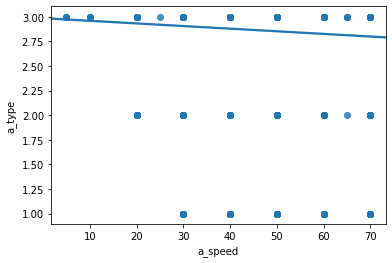

In [24]:
sns.regplot(x='a_speed', y="a_type", data=df)

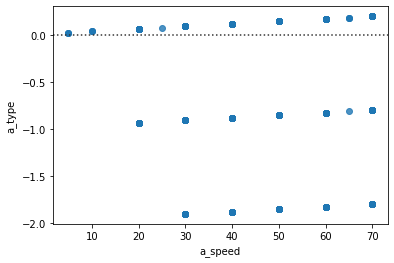

In [25]:
sns.residplot(df['a_speed'], df["a_type"])